##  <h1><center>Estratificación poblacional y análisis de variabilidad <h1>

Cuaderno de Python enmarcado en el Trabajo de Fin de Grado: "Diseño de regímenes de tratamiento óptimos en pacientes hipertensos con insuficiencia renal. Un enfoque desde el Aprendizaje por Refuerzo". Cuaderno para la realización de la estratificación poblacional de un conjunto de datos de 10.000 pacientes tratados con 10 mg de Benazepril. Estratificación basada en los valores de una selección variables antropométricas y fisiológicas, previamente escogidas mediante el análisis estadístico de las relaciones de un conjunto mayor de variables clínicas con el resultado farmacocinético al séptimo día de tratamiento y la selección consiciente acorde al dominio del problema. Para la definición de los grupos de estratificación se hace uso de rangos de valores comúnmente utilizados en estratificaciones poblacionales consultados en bibliografía.

In [11]:
# Para el procesamiento de datos
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Para guardar las tablas en formato docx
import docx
from docx.shared import Pt
# Para la representación gráfica
import matplotlib.patches as mpatches
# Para guardar las imágenes en formato .tiff
from PIL import Image   
import io

**Carga de los datos**

In [12]:
# Carga de los datos de 10.000 pacientes con diferentes estadíos de insuficiencia renal tratados con una dosis de 10mg de Benazepril al día durante siete días.

data = pd.read_excel('../Data/A2_DOK_10000patStrat_10mg_V01.xlsx', sheet_name = '10mg')

**Funciones**

In [13]:
def df_to_file(df, path, filename):

    doc = docx.Document() # create new document
    #doc = docx.Document('./selección_de_variables/spearman.docx') # sobreescribe uno existente
    # add a table 
    t = doc.add_table(df.shape[0]+1, df.shape[1])

    # add the header rows
    for j in range(df.shape[-1]):
        t.cell(0,j).text = df.columns[j]

    # add the rest of the data frame
    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i+1,j).text = str(df.values[i,j])

    t.style = 'Table Grid' # with borders
    
    style = doc.styles['Normal']
    font = style.font
    font.name = 'Times New Roman'
    font.size = Pt(8)

    file = path + filename + '.docx'

    doc.save(file)

In [14]:
# Categorización de la variable de ICM (5):
# Delgadez severa: < 16, Delgadez media-moderada: 16-18.5, Normal: 18.5 – 25, Sobrepeso: 25-30, Obeso I: > 30

def BMI_subgroups(BMI):
    if (BMI < 16):
        subgroup = "Bajo peso severo"
    elif (16 <= BMI < 18.5):
        subgroup = "Bajo peso moderado"
    elif (18.5 <= BMI < 25):
        subgroup = "Normal"
    elif (25 <= BMI < 30):
        subgroup = "Sobrepeso"
    elif (BMI >= 30):
        subgroup = "Obesidad"
    return subgroup


In [15]:
# Categorización de la variable de TFG (6) en variables Función_renal:
# Función renal normal: ≥ 90, IR leve: 60 - 89, IR leve-moderada: 45 – 60, IR moderada: 30 - 45, IR severa I: 15 - 30, Fallo renal < 15
def GFR_subgroups(GFR):
    if (GFR >= 90):
        subgroup = "Normal"
    elif (90 > GFR >= 60):
        subgroup = "IR leve"
    elif (60 > GFR >= 45):
        subgroup = "IR leve-moderada"
    elif (45 > GFR >= 30):
        subgroup = "IR moderada"
    elif (30 > GFR >= 15):
        subgroup = "IR severa"
    else:
        subgroup = 'Fallo renal'
    return (subgroup)

In [16]:
def ERC_subgroups(GFR):
    if (GFR == 'Normal'):
        subgroup = "Etapa 1"
    elif (GFR == "IR leve"):
        subgroup = "Etapa 2"
    elif (GFR == "IR leve-moderada"):
        subgroup = "Etapa 3a"
    elif (GFR == "IR moderada"):
        subgroup = "Etapa 3b"
    elif (GFR == "IR severa"):
        subgroup = "Etapa 4"
    else:
        subgroup = 'Etapa 5'
    return (subgroup)

In [17]:
# Conversión de la variable categórica numérica Género a variable categórica de texto
def text_Gender(Gender):
    if (Gender == 0):
        subgroup = "Hombre"
    else:
        subgroup = "Mujer"
    return(subgroup)

**Definición de rangos de valores de las variables de estratificación**

Las variables que definen los grupos de la estratificación, seleccionadas mediante el análisis de regresión lineal múltiple y basándose en el conocimiento y las limitaciónes del dominio del poblema son:

- Género. Variable categórica numérica con dos categorías: O si Hombre, 1 si Mujer
- Índice de Masa Corporal o ICM (kg / $m^2$). El ICM relaciona el peso de un individuo con su altura. Es una variable cuantitativa continua que clasifica a los individuos según esta relación en 5 categorías según unos rangos definidos y consensuados. https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations 
- Tasa de Filtración Glomerular o TFG (ml/min). La tasa o ínidce de filtración glomerular es el volumen de fluido filtrado por unidad de tiempo desde los capilares glomerulares renales hacia el interior de la cápsula de Bowman. La TFG mide el aclarado, es igual a la relación de depuración renal cuando cualquier soluto se filtra libremente y no es reabsorbido ni secretado por los riñones. Es una de las medidas de la función renal y depende del tono basal diferencial de las arteriolas aferentes y eferentes. El parámetro TFG es una variable cuantitivativa contínua categorizada en 5 clases que definen la función renal:https://www.kidneyfund.org/es/todo-sobre-los-rinones/las-pruebas-de-deteccion-de-la-enfermedad-renal/analisis-de-sangre-la-egfr https://www.kidneyfund.org/es/todo-sobre-los-rinones/etapas-o-estadios-de-la-enfermedad-renal. La estadificación de la enfermedad renal crónica se basa en las categorías de TFG, así como en la albuminuria y la causa de la enfermedad renal

Estadíos de ERC según TFG:
- Etapa 1: Función renal normal (TFG < 90)
- Etapa 2: ERC leve (TFG = 60-89)
- Etapa 3: 
      <BR>
        - Etapa 3a: ERC leve-moderada (TFG = 45-59) \
        - Etapa 3b: ERC moderada (TFG = 30-44)
- Etapa 4: ERC severa (TFG = 15-29)
- Etapa 5: Fallo renal (TFG < 15)

In [18]:
data['grupo_ICM'] = data['BMI'].map(BMI_subgroups)
data['Función_renal'] = data['GFR'].map(GFR_subgroups)
data['Género'] = data['Gender'].map(text_Gender)


Estratificación poblacional: clasificación de pacientes en función a sus características poblacionales y el riesgo (los valores de ABC y Cmáx). Se cuenta el número de pacientes en cada grupo y se calcula la media de los parámetros antropométricos, fisiológicos y farmacocinéticos que no participan en la estratificación para cada grupo

In [40]:
order_gfr= ['Normal', 'IR leve', 'IR leve-moderada', 'IR moderada', 'IR severa', 'Fallo renal'] # orden Función renal
data['Función_renal'] = pd.CategoricalIndex(data['Función_renal'], ordered=True, categories=order_gfr) 

order_bmi = ['Bajo peso severo', 'Bajo peso moderado', 'Normal', 'Sobrepeso', 'Obesidad'] # orden ICM 
data['grupo_ICM'] = pd.CategoricalIndex(data['grupo_ICM'], ordered=True, categories=order_bmi)

patients = data.groupby(['Género', 'grupo_ICM', 'Función_renal']).size()
strat_table = round(data.groupby(['Género', 'grupo_ICM', 'Función_renal']).mean(), 2) # media de las variables

strat_table['Nº pacientes'] = patients
strat_table =  strat_table.dropna(how = 'any')

strat_table = strat_table.reset_index()

strat_table['ERC'] = strat_table['Función_renal'].map(ERC_subgroups)


In [47]:
# Cálculo de la desviación estándar de los parámetros AUC y Cmáx dentro de cada grupo de estratificación
sd_tab = round(data.groupby(['Género', 'grupo_ICM', 'Función_renal'])[['AUCday7', 'Cmaxday7']].std(), 2).reset_index()
sd_tab = sd_tab.rename(columns={'AUCday7':'SD AUC', 'Cmaxday7':'SD Cmax'})
reduced_sd = sd_tab.loc[:, ['Género', 'grupo_ICM', 'Función_renal', 'SD AUC', 'SD Cmax']][(sd_tab['Función_renal'] != 'Normal') & (sd_tab['Función_renal'] != 'Fallo renal')].reset_index(drop = True)


A partir de la tabla de estratificación se hace una selección de variables representadas en la estratificación: se mantienen la categorías de estratificación además de las medias y la desviación típica de las medidas de ABC y Cmáx a tiempo final (t = 7). 

Además, se seleccionan los grupos de pacientes que serán objeto de estudio en el marco de este proyecto. Para el estudio del diseño de regímenes de dosificación de Benazepril optimizados mediante el modelo computacional de Aprendizaje por Refuerzo se escogen los grupos de pacientes cuya función renal sea de insuficiencia renal leve, leve-moderada, moderada o severa. Los pacientes sanos se excluyen de este estudio pues sus perfiles farmacocinéticos ya se ajustan a los perfiles de pacientes clínicos, objetivo del proyecto, pues el modelo de farmacocinética simula los datos de estos pacientes basándose en los extraodos de los propios ensayos clínicos. Los pacientes clasificados en grupos con fallo renal son también excluidos debido a que estos pacientes diagnosticados con enfermedad renal crónica en estadío 5. Estos pacientes son generalmente tratados con terapias renales sustitutivas como la diálisis para la extracción de toxinas y exceso de agua de los vasos sanguíneos, lo que puede alterar los niveles de concentración plasmática de fármaco.

In [56]:
reduced_table = strat_table.loc[:, ['Género', 'grupo_ICM', 'Función_renal','ERC', 'AUCday7', 'Cmaxday7', 'Nº pacientes']][(strat_table['Función_renal'] != 'Normal') & (strat_table['Función_renal'] != 'Fallo renal')].reset_index(drop = True)
reduced_table = reduced_table.set_index(['Género', 'grupo_ICM', 'Función_renal']).join(reduced_sd.set_index(['Género', 'grupo_ICM', 'Función_renal'])).reset_index()

reduced_table = reduced_table.rename(columns={'AUCday7':'ABC día 7', 'Cmaxday7':'Cmáx día 7'})
reduced_table

,Género,grupo_ICM,Función_renal,ERC,ABC día 7,Cmáx día 7,Nº pacientes,SD AUC,SD Cmax
0,Hombre,Bajo peso severo,IR leve,Etapa 2,614.29,131.68,26,121.02,12.17
1,Hombre,Bajo peso severo,IR leve-moderada,Etapa 3a,852.96,142.34,16,93.27,7.83
2,Hombre,Bajo peso severo,IR moderada,Etapa 3b,1089.77,148.12,13,245.69,12.56
3,Hombre,Bajo peso severo,IR severa,Etapa 4,1555.52,163.90,12,196.45,11.01
4,Hombre,Bajo peso moderado,IR leve,Etapa 2,611.52,134.08,266,168.23,17.48
5,Hombre,Bajo peso moderado,IR leve-moderada,Etapa 3a,833.80,141.35,147,234.79,17.27
6,Hombre,Bajo peso moderado,IR moderada,Etapa 3b,1119.09,151.44,128,332.92,19.32
7,Hombre,Bajo peso moderado,IR severa,Etapa 4,1708.06,170.43,130,506.25,25.31
8,Hombre,Normal,IR leve,Etapa 2,847.66,157.65,1051,283.38,26.20
9,Hombre,Normal,IR leve-moderada,Etapa 3a,1156.67,166.67,568,405.86,28.07


Finalmente se obtienen 40 grupos de pacientes caracterizados según el Género, el grupo de ICM y el estado de la función renal.

In [57]:
path="../Resultados/"
file = 'Stratification_GFR'

df_to_file(reduced_table, path, file)

**Analisis de variabilidad intragrupo de los parámetros farmacocinéticos**

In [102]:
study_data= data[(data['Función_renal'] != 'Normal') & (data['Función_renal'] != 'Fallo renal')]
order_gfr2= ['IR leve', 'IR leve-moderada', 'IR moderada', 'IR severa'] # orden Función renal
study_data['Función_renal'] = pd.CategoricalIndex(study_data['Función_renal'], ordered=True, categories=order_gfr2) 

In [103]:
study_data['ID_group'] = study_data.groupby(['Género', 'grupo_ICM', 'Función_renal']).ngroup() + 1


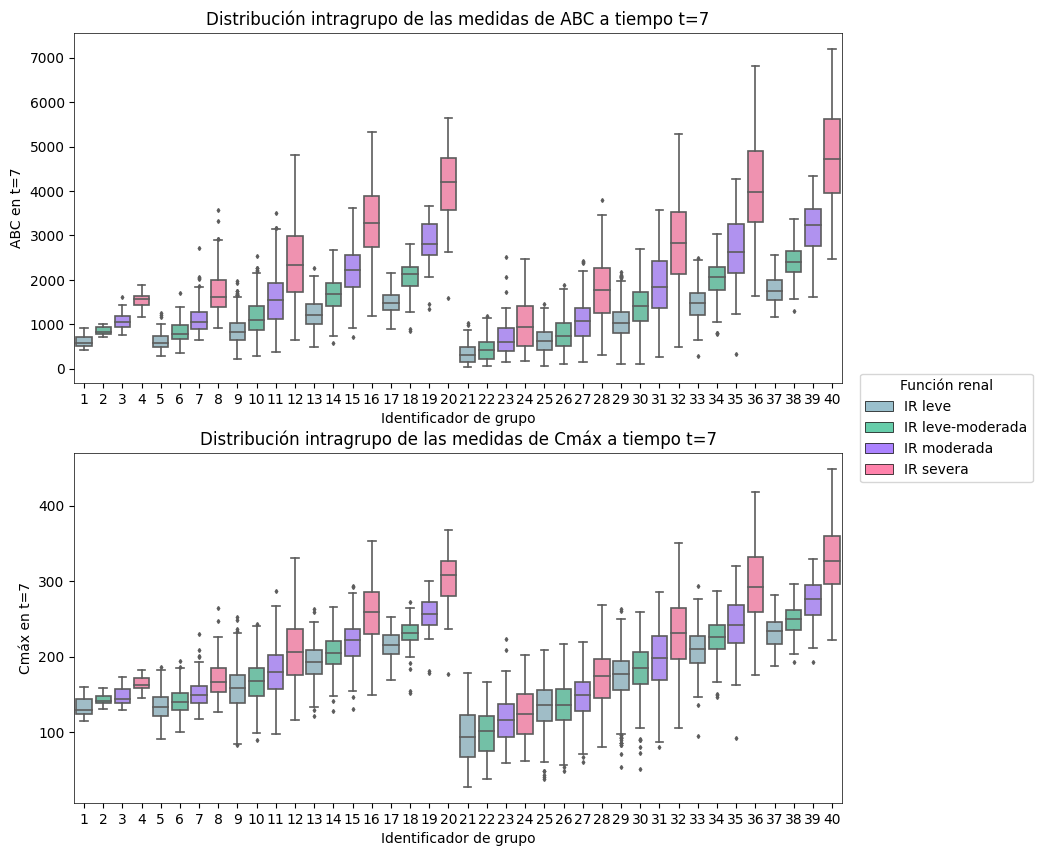

In [229]:
pal = sns.color_palette(['#9AC0CD', '#66CDAA', '#AB82FF', '#FF82AB'])

# Subgráficos con gráficos de caja de la distribución de los parámetros farmacocinéticos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 10))
b1 = sns.boxplot(x="ID_group", y="AUCday7", data=study_data, ax=ax1, palette=pal, fliersize=2, linewidth=1.2)
b1.set(xlabel='Identificador de grupo')
b1.set(ylabel='ABC en t=7')
b1.axes.set_title('Distribución intragrupo de las medidas de ABC a tiempo t=7', fontsize=12)

b2 = sns.boxplot(x="ID_group", y="Cmaxday7", data=study_data, ax=ax2, palette=pal, fliersize=2, linewidth=1.2)
b2.axes.set_title('Distribución intragrupo de las medidas de Cmáx a tiempo t=7', fontsize=12)
b2.set(ylabel='Cmáx en t=7')
b2.set(xlabel='Identificador de grupo')

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.5)
    ax2.spines[axis].set_linewidth(0.5)

# Creación de leyenda de forma manual
blue_patch = mpatches.Patch(color='#9AC0CD', label='IR leve', ec = 'black', linewidth=0.5)
green_patch = mpatches.Patch(color='#66CDAA', label='IR leve-moderada', ec = 'black', linewidth=0.5)
purple_patch = mpatches.Patch(color='#AB82FF', label='IR moderada', ec = 'black', linewidth=0.5)
pink_patch = mpatches.Patch(color='#FF82AB', label='IR severa', ec = 'black', linewidth=0.5 )

pos = ax1.get_position()
pos2 = ax2.get_position()

ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax2.set_position([pos2.x0, pos2.y0, pos2.width * 0.9, pos.height])

fig.legend(loc='center right', handles=[blue_patch, green_patch, purple_patch, pink_patch], title = 'Función renal')

plt.show()

# Se guarda la imagen en formato PNG
png1 = io.BytesIO()
fig.savefig(png1, format="png")

# Se carga la imagen el PIL
png2 = Image.open(png1)

# Se guarda como TIFF
png2.save("Barplot_intragrupo.tiff")
png1.close()